## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EDA

In [2]:
url = 'https://raw.githubusercontent.com/ronalcabrera/PG_Olist/main/Datasets/olist_customers_dataset.csv'
customers = pd.read_csv(url, delimiter=',', encoding='UTF-8')

In [3]:
# Web scrapping
estados = pd.read_html('https://es.wikipedia.org/wiki/Unidad_federativa_de_Brasil#Lista_de_unidades_federativas_brasile%C3%B1as')

# Creo y limpio dataframe
estados = estados[0]
estados = estados[['Unidad federativa', 'Código ISO', 'Capital', 'Densidad(2021)']]
estados['Código ISO'] = estados['Código ISO'].str.replace('BR-','')

Verifico la integridad de los datos en customers

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Sin nulos

In [5]:
lst = []
for i in range(len(estados['Código ISO'])):
    if not(estados['Código ISO'][i] in customers.customer_state.unique()):
        lst.append(estados['Unidad federativa'][i])
print('No hay clientes en las Unidades Federativas:', lst)

No hay clientes en las Unidades Federativas: []


Genial, hay clientes en de todas partes de brasil.

In [6]:
print('En Brasil hay 5570 ciudades en total, de las cuales se registran compradores en',len(customers.customer_city.unique())
, ', lo que significa que resta un', round((1-len(customers.customer_city.unique())/5570)*100,2), '% de ciudades donde captar clientes')

En Brasil hay 5570 ciudades en total, de las cuales se registran compradores en 4119 , lo que significa que resta un 26.05 % de ciudades donde captar clientes


Text(0, 0.5, 'Clientes')

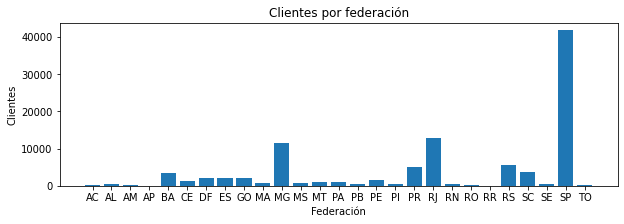

In [7]:
clientes_por_federacion = customers.groupby(['customer_state'])['customer_city'].agg('count').reset_index()
clientes_por_federacion.rename(columns={'customer_city':'cant_clientes'}, inplace=True)

# Grafico la cantidad de vendedores por federacion
plt.figure(figsize=(10,3))
plt.title('Clientes por federación')
plt.bar(clientes_por_federacion['customer_state'], clientes_por_federacion['cant_clientes'])
plt.xlabel('Federación')
plt.ylabel('Clientes')

Se puede apreciar que nuevamente la mayor parte de los clientes se encuentran en Sao Paulo, luego se distribuyen entre 5-6 federaciones mas la mayor concentracion de ellos.